In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

###The feature vector will now contain multiple features
###n denotes the number of features
###m still denotes the number of training examples
###$$h(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3}...\theta_{n}x_{n}$$
###Cost function remains the same: $$J(\theta_{0}, \theta_{1}, \theta_{2},...,\theta_{n}) = \frac{1}{2m} \sum (\hat{y} - y)^2$$

In [2]:
def h(x, theta):
    #print "x ", x.shape
    #print "theta ", theta.T.shape
    return np.dot(theta.T, x)

def J(h, x, theta, y):
    h1 = h(x, theta)
    diff = (h1 - y.T)*(h1 - y.T)
    return (1.0/2.0*len(y))*diff.sum()

In [9]:
#This code creates an artificial dataset of 100 points
m = 200

min_sf = 1000
max_sf = 3000
min_bath = 1
max_bath = 4

#Generate m points between 1000 and 3000 as input features x1
#and m points between 1 and 3 as input features x2
x1=np.array(np.linspace(min_sf, max_sf, m))
x2=np.random.randint(min_bath, max_bath, size=m)
#Generate a little noise to add to x
x1 += np.random.normal(0.0, 250.0, m)

#Now generate y - a plane. 
theta0 = 75
theta1 = 0.15
theta2 = 0.65

def calc_house_price(theta0, theta1, theta2, x1, x2):
    return (theta2 * x2) + (theta1 * x1) + theta0

In [10]:
data = {'sqft': x1, 'baths': x2, 'price': calc_house_price(theta0, theta1, theta2, x1, x2)}

In [11]:
df=pd.DataFrame(data, columns=['sqft', 'baths', 'price'])

In [12]:
df.head()

,sqft,baths,price
0,1015.593030,1,227.988954
1,1345.005616,1,277.400842
2,1143.073242,3,248.410986
3,618.309626,2,169.046444
4,847.021494,2,203.353224


In [13]:
df.corr()

,sqft,baths,price
sqft,1.000000,0.002918,0.999985
baths,0.002918,1.000000,0.008460
price,0.999985,0.008460,1.000000


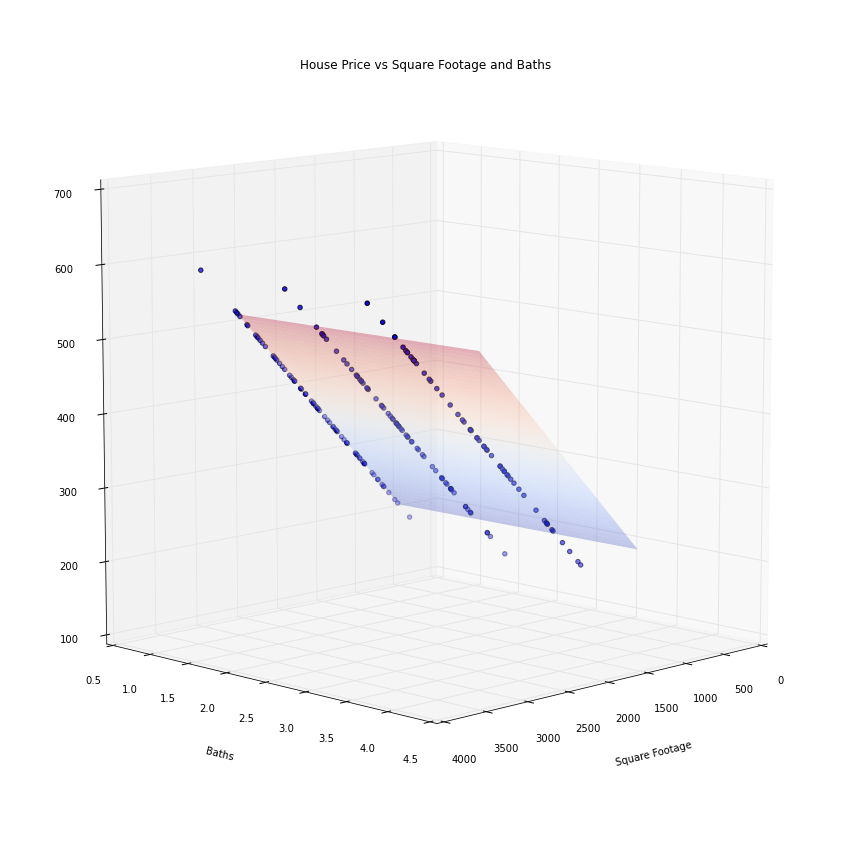

In [14]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1, 1, 1, projection='3d')

A=50
X1 = np.linspace(min_sf, max_sf, A)
X2 = np.linspace(min_bath, max_bath, A)
X1, X2 = np.meshgrid(X1, X2)

Z=[]
for i in range(A):
    for j in range(A):
        Z.append(calc_house_price(theta0, theta1, theta2, X1[i][j], X2[i][j]))

Z = np.array(Z)
Z = Z.reshape(A, A)

ax.elev=10.0
ax.azim=45.0
ax.set_title("House Price vs Square Footage and Baths")
ax.set_xlabel("Square Footage")
ax.set_ylabel("Baths")
surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True, alpha=0.3)
ax.scatter(df.sqft, df.baths, df.price)

In [15]:
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(df[['sqft', 'baths']])
x_scaled =  scaler.transform(df[['sqft', 'baths']])

In [40]:
#set the hyper-parameters of the model
clf = SGDRegressor(loss='squared_loss', eta0=0.001, fit_intercept=True, \
                   n_iter=20000, shuffle=True, verbose=False)

#for using scikit learn you always need to get the input arrays into the correct 'shape'
#x1 = x_scaled.reshape(m,1)

#fit the model
clf.fit(x_scaled, df['price'])
y_true = df['price']
y_hat = clf.predict(x_scaled)
print mean_squared_error(y_true, y_hat)

9.01899851651e-05


In [41]:
print clf.coef_
print clf.intercept_

[ 94.97085439   0.52642497]
[ 376.28747181]


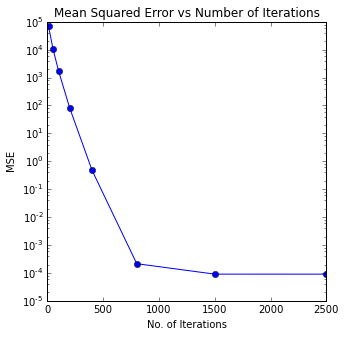

In [46]:
mse =[]
iters_list = [10, 50, 100, 200, 400, 800, 1500, 2500]
for iters in iters_list:
    clf = SGDRegressor(loss='squared_loss', eta0=0.001, fit_intercept=True, \
                       n_iter=iters, shuffle=True, verbose=False)
    clf.fit(x_scaled, df['price'])
    y_true = df['price']
    y_pred = clf.predict(x_scaled)
    mse.append(mean_squared_error(y_true, y_pred))
    
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.plot(iters_list, mse, marker='o', color='b')
ax.set_title("Mean Squared Error vs Number of Iterations")
ax.set_xlabel("No. of Iterations")
ax.set_ylabel("MSE")
#ax.set_xscale("Log")
ax.set_yscale("Log")
#ax.set_xlim(-1, iters_list[-1])
#ax.set_ylim(0, 2e6)

In [42]:
x_new = [2495.0, 2]
x_new_scaled = scaler.transform(x_new)
print clf.predict(x_new_scaled)

[ 450.54257813]


---
##Use the normal equations
---

In [43]:
#set the hyper-parameters of the model
clf = linear_model.LinearRegression(fit_intercept=True)

#for using scikit learn you always need to get the input arrays into the correct 'shape'
#fit the model
clf.fit(x_scaled, df['price'])

y_true = df['price']
y_pred = clf.predict(x_scaled)
print mean_squared_error(y_true, y_pred)

print clf.coef_
print clf.intercept_

3.09788832924e-27
[ 94.98035113   0.52644984]
376.287471702


In [44]:
x_new = [2495.0, 2]
x_new_scaled = scaler.transform(x_new)
print clf.predict(x_new_scaled)

450.55
